#Load & Clean Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Exploratory Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

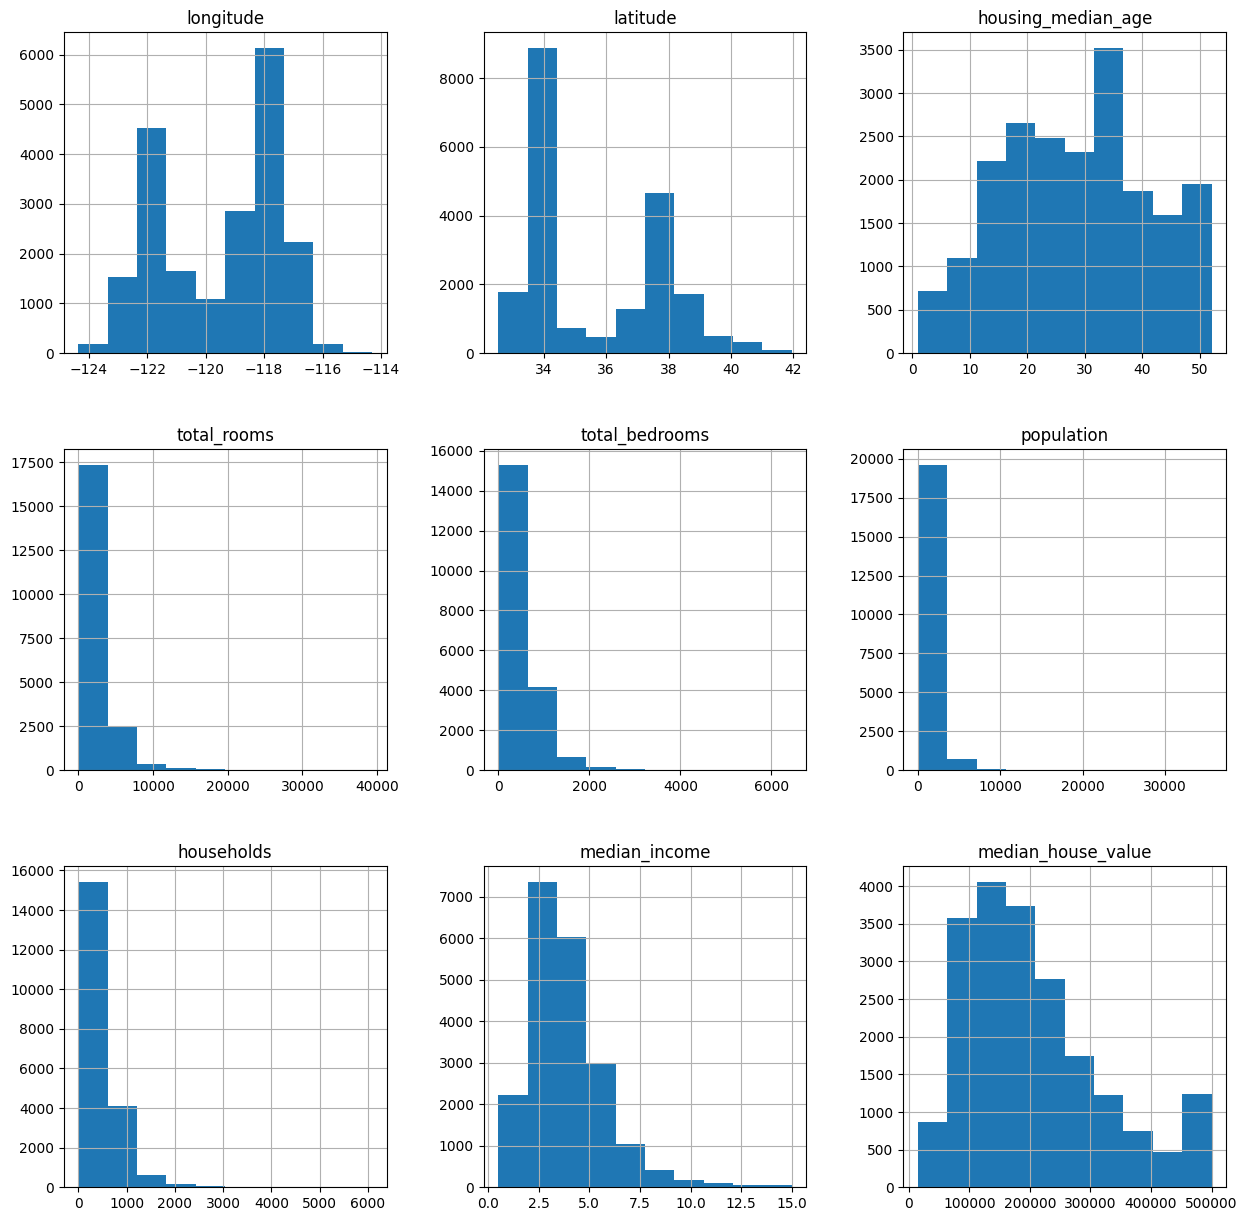

In [8]:
df.hist(figsize=(15,15))

<Axes: >

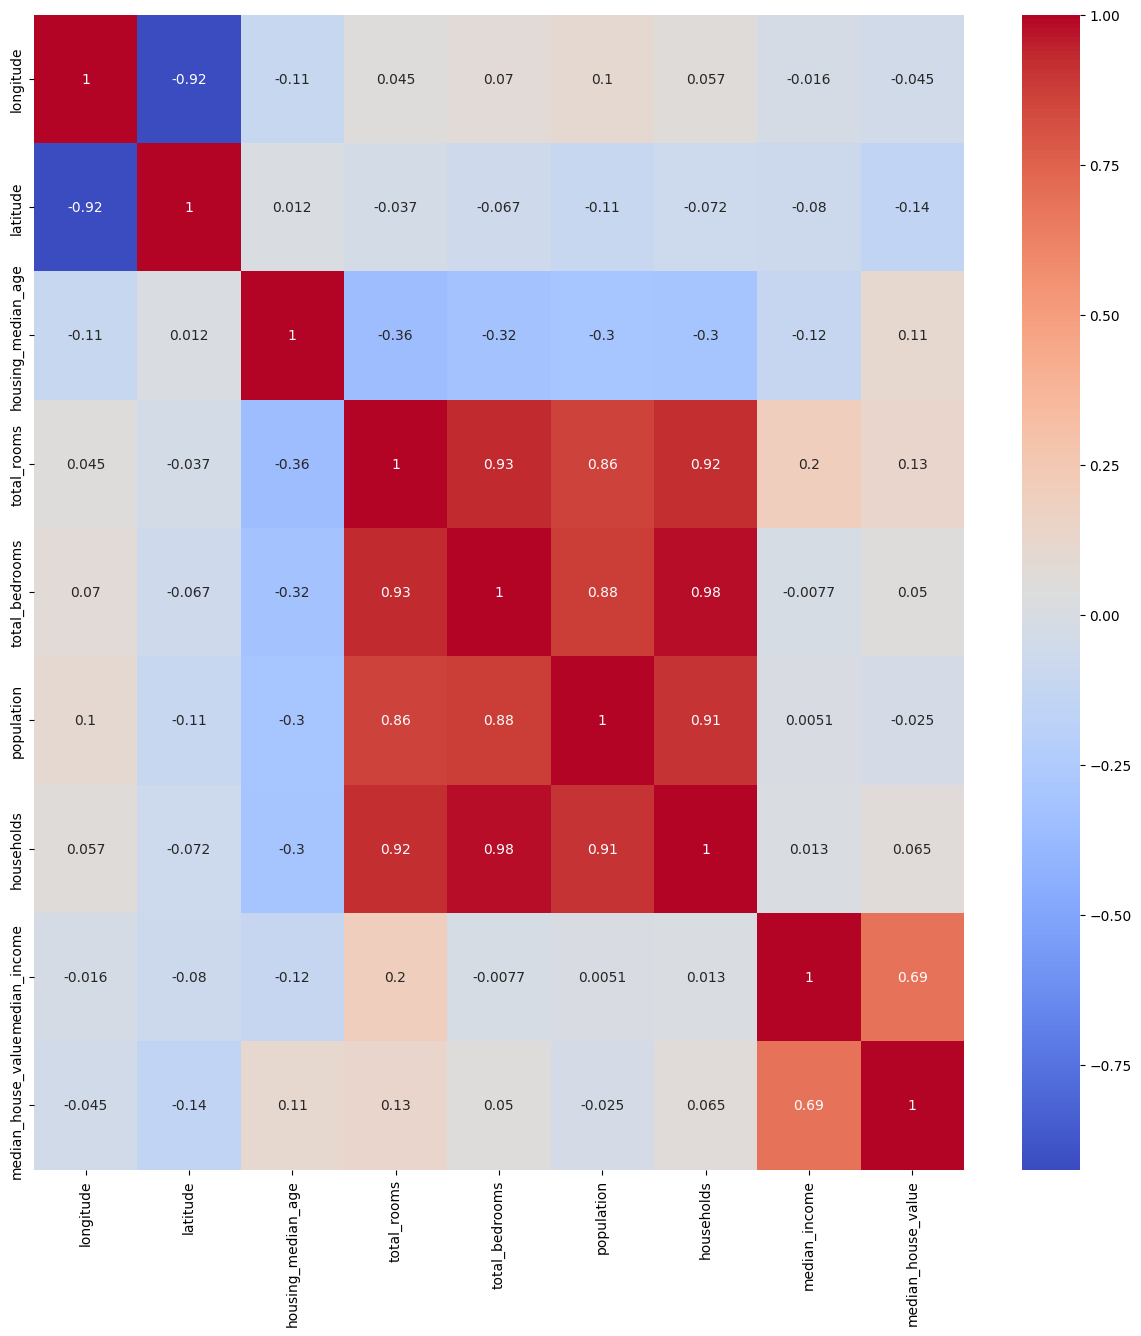

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")


<Axes: xlabel='latitude', ylabel='longitude'>

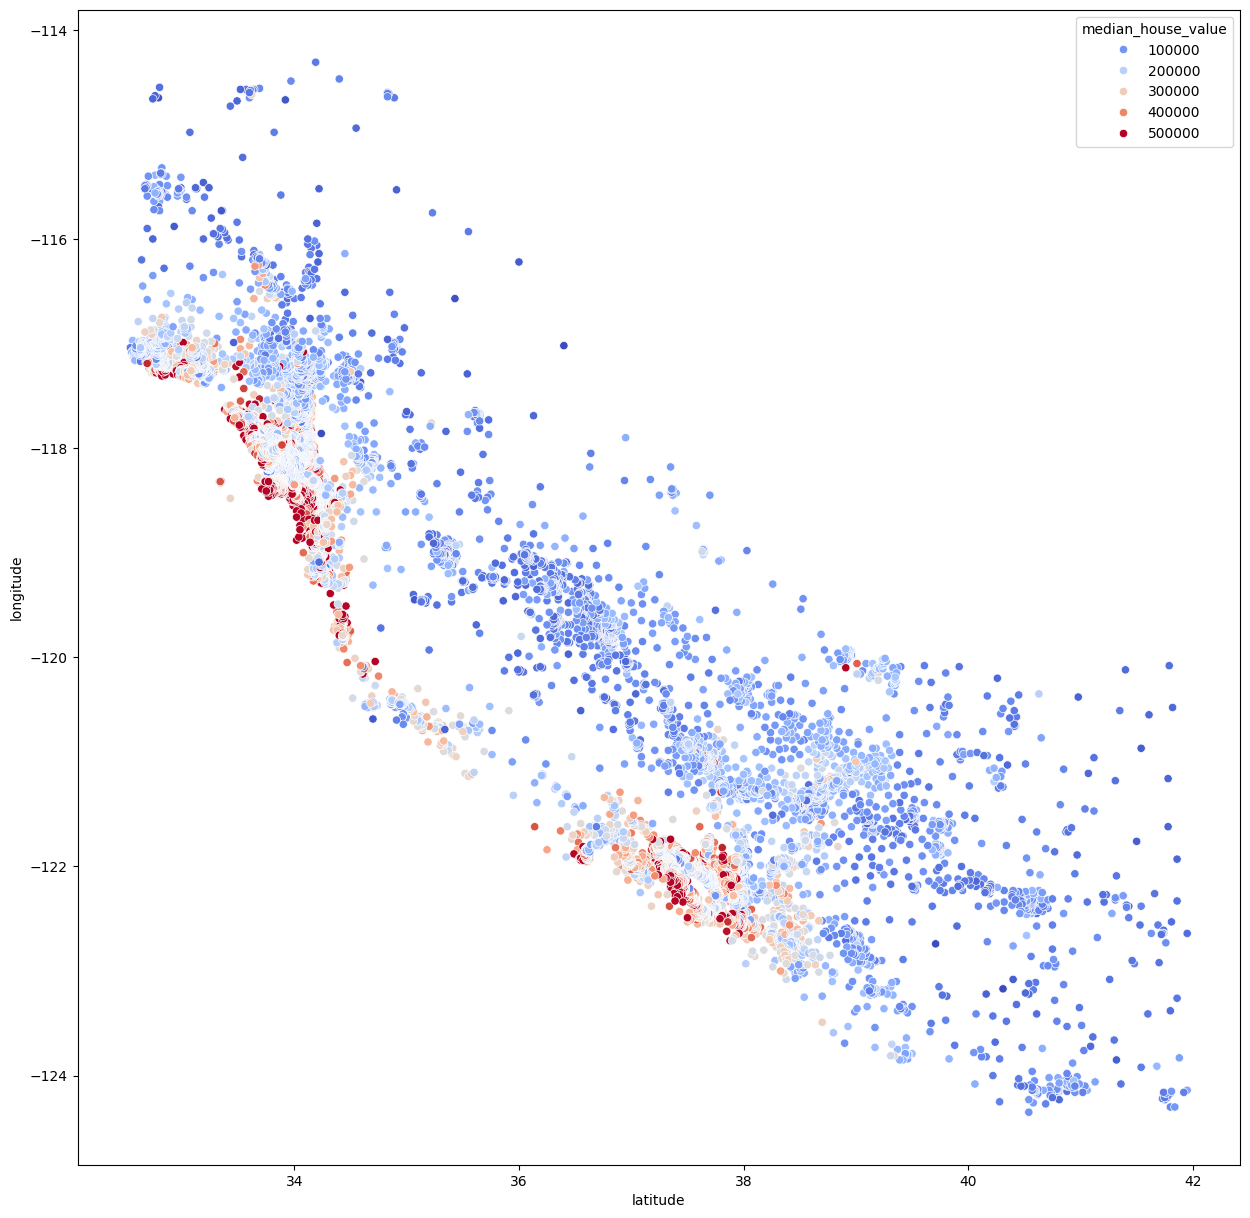

In [10]:
plt.figure(figsize=(15,15))
sns.scatterplot(y='longitude', x='latitude', data=df,
                hue='median_house_value', palette="coolwarm")

# Feature Engineering (Log Transform + New Features)

In [11]:
for col in ['total_rooms','total_bedrooms','population','households']:
    x_train[col] = np.log(x_train[col] + 1)
    x_test[col] = np.log(x_test[col] + 1)
x_train['bedroom_ratio'] = x_train['total_bedrooms'] / x_train['total_rooms']
x_train['household_rooms'] = x_train['total_rooms'] / x_train['households']

x_test['bedroom_ratio'] = x_test['total_bedrooms'] / x_test['total_rooms']
x_test['household_rooms'] = x_test['total_rooms'] / x_test['households']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

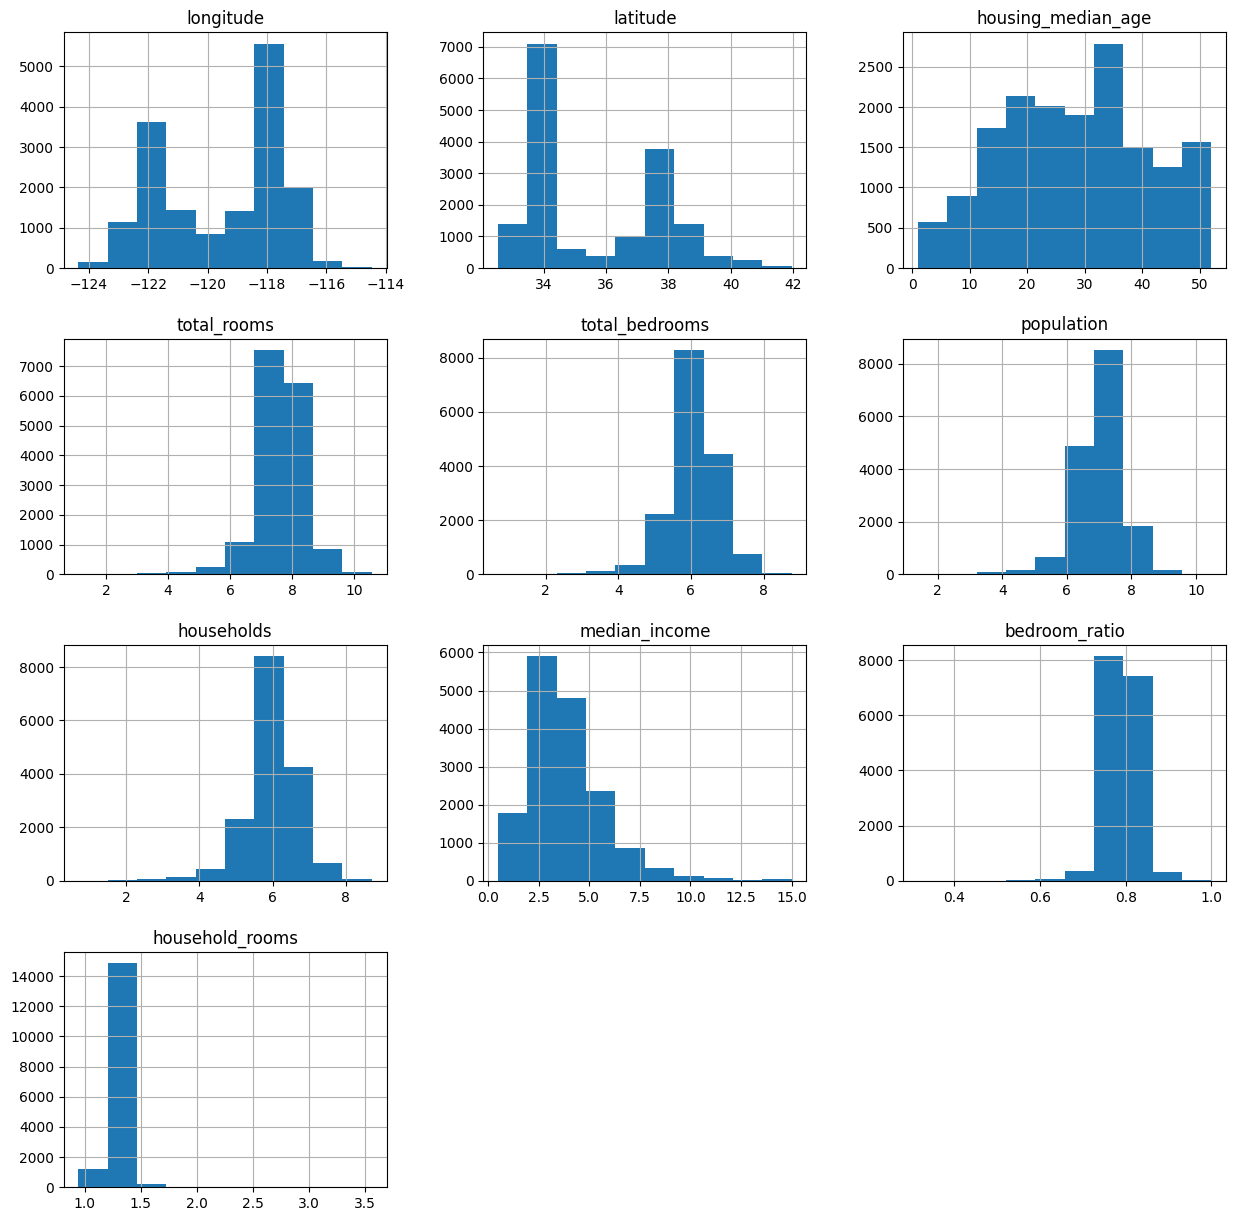

In [12]:
x_train.hist(figsize=(15,15))

#Encoding & Align Train/Test

In [13]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

<Axes: >

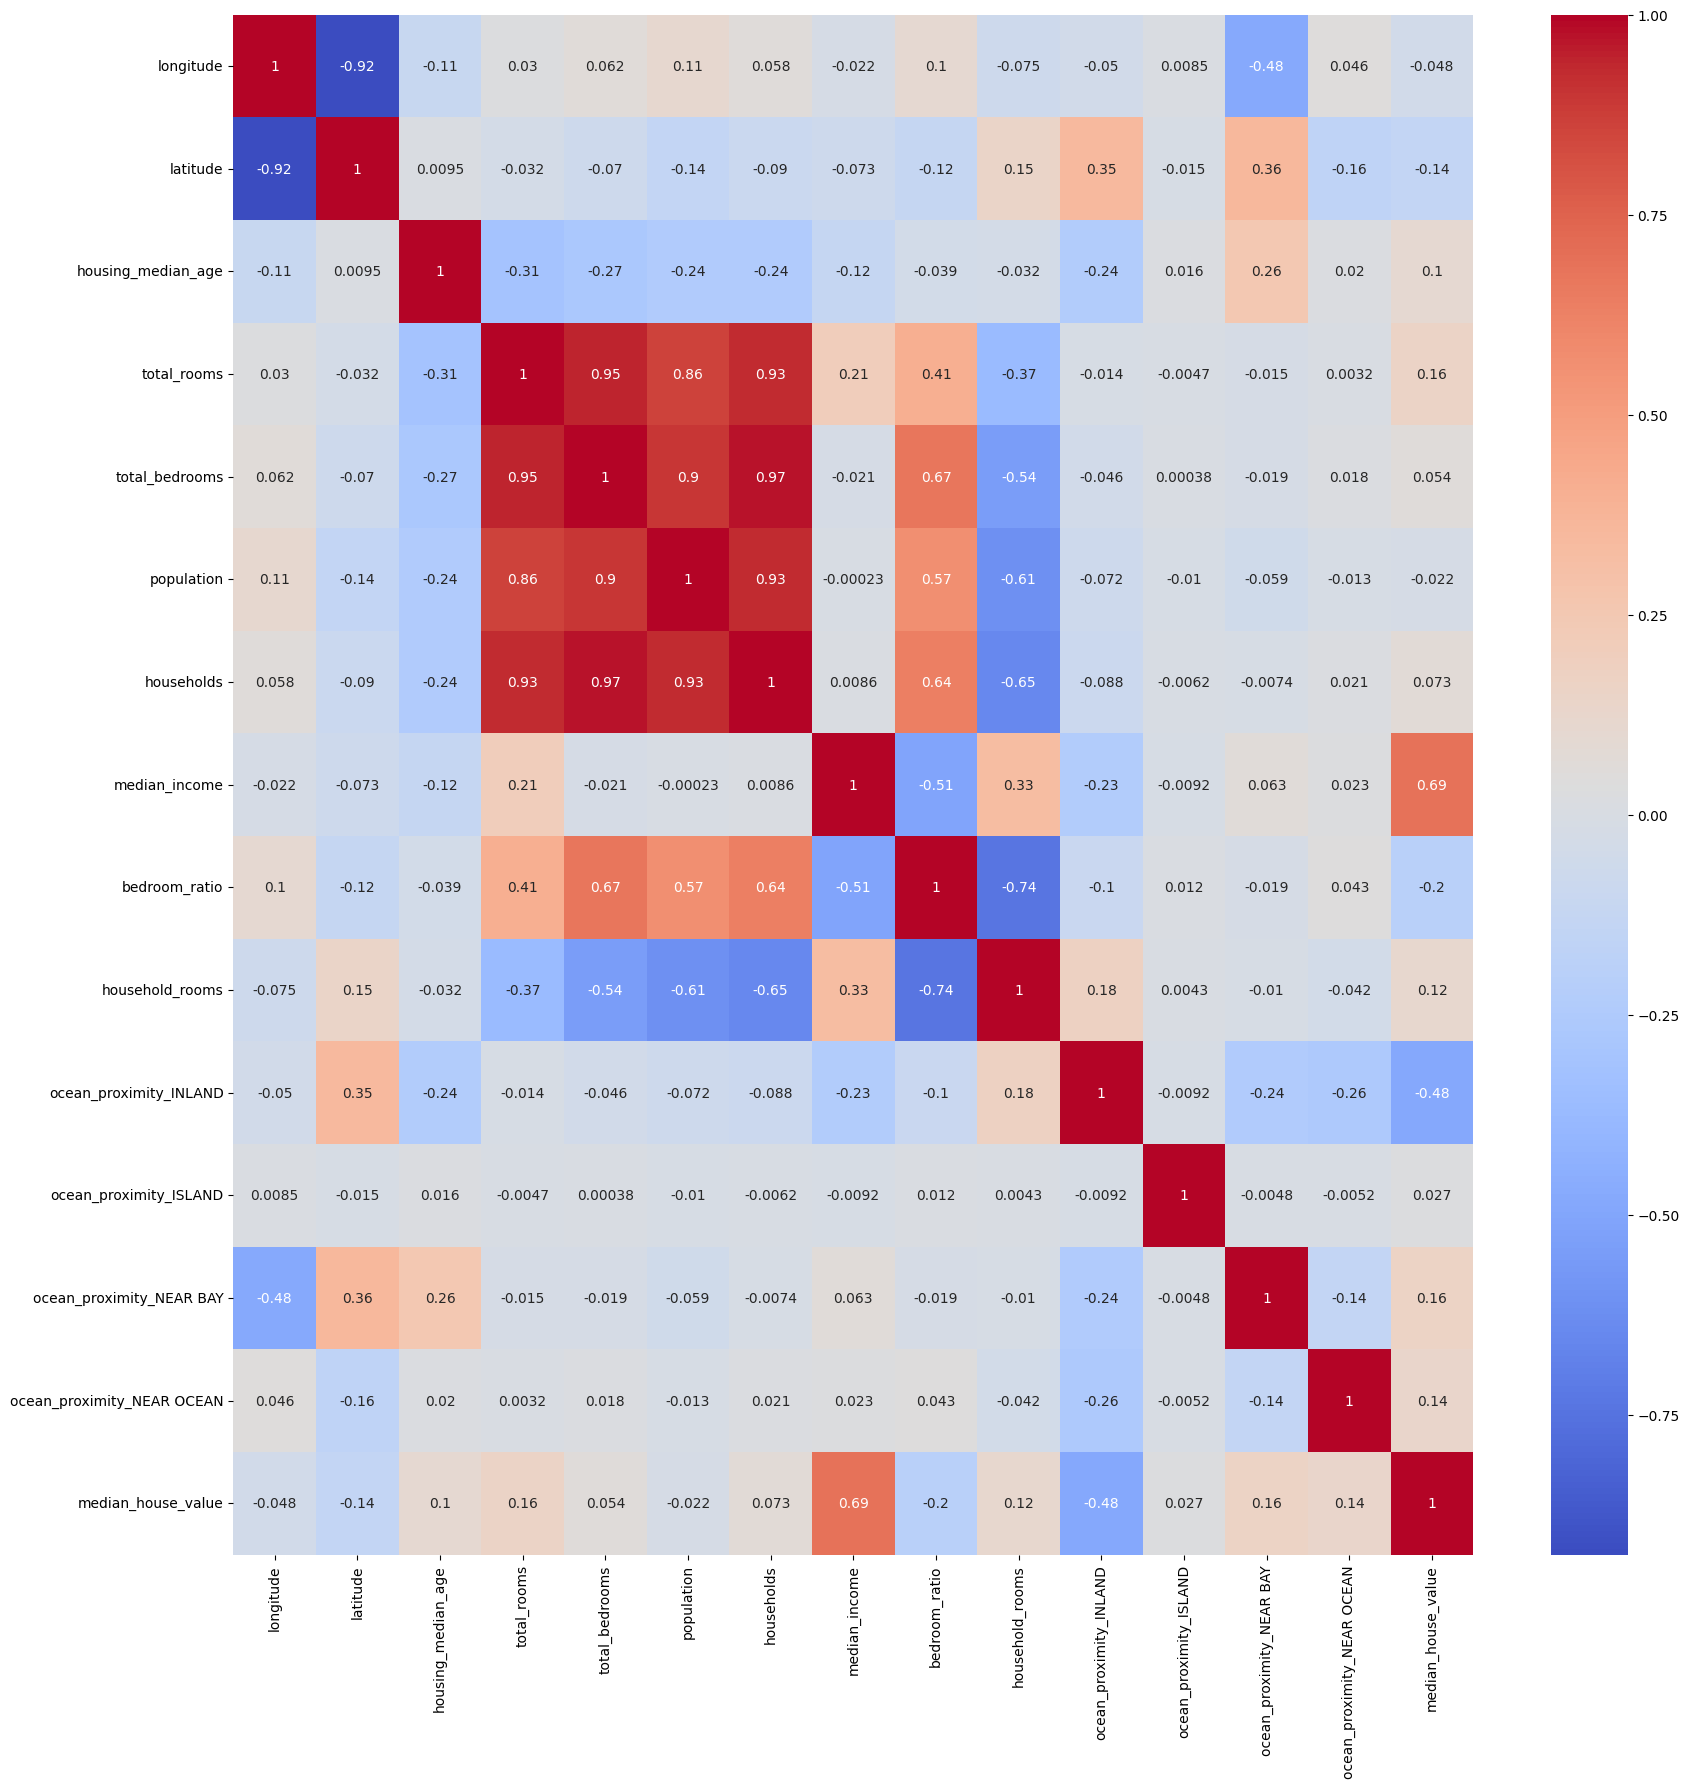

In [14]:
train_data = x_train.join(y_train)
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="coolwarm")

#Train Models

### Linear Regression

In [15]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print("Train R²:", reg.score(x_train, y_train))
print("Test R²:", reg.score(x_test, y_test))


Train R²: 0.6715588960110033
Test R²: 0.6687407117584974


In [16]:
y_pred_lin = reg.predict(x_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("RMSE:", rmse_lin)


RMSE: 67305.50240329807


### Random Forest

In [17]:
fore = RandomForestRegressor(random_state=42)
fore.fit(x_train, y_train)

print("Train R²:", fore.score(x_train, y_train))
print("Test R²:", fore.score(x_test, y_test))

Train R²: 0.9741009193493338
Test R²: 0.8187519650111347


In [18]:
y_pred_forest = fore.predict(x_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print("RMSE:", rmse_forest)

RMSE: 49785.536510002705


#Hyperparameter Tuning (GridSearch)

In [19]:
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}
grid_search = GridSearchCV(fore, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train, y_train)

best_forest = grid_search.best_estimator_

print("Best Random Forest Train R²:", best_forest.score(x_train, y_train))
print("Best Random Forest Test R²:", best_forest.score(x_test, y_test))

y_pred_best = best_forest.predict(x_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("Best Random Forest RMSE:", rmse_best)


Best Random Forest Train R²: 0.971404795839637
Best Random Forest Test R²: 0.8152849935617346
Best Random Forest RMSE: 50259.4379886945


# Model Evaluation Visualization

##Actual vs Predicted for Linear Regression

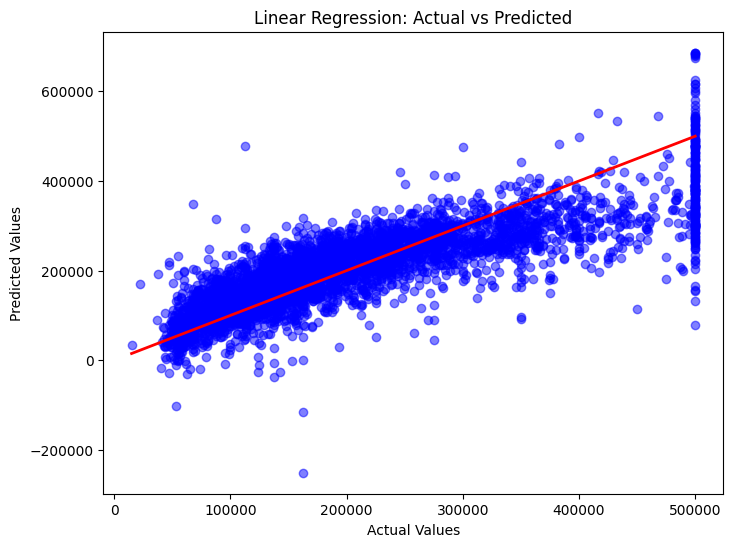

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)
plt.show()